In deze oefening gaan we aan de slag met ECMWF-data. 
We gaan data importeren en bekijken daarna hoe we de data kunnen bewerken en weergeven.
We maken gebruik van de ECMWF open dataset.

Access to ECMWF Open data is governed by the Creative Commons CC-BY-4.0 licence and associated Terms of Use.

In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor does it submit to any jurisdiction

We kijken eerst welke data er eigenlijk in deze dataset beschikbaar is.

Product description:

These products are a subset of the full Catalogue of ECMWF Real-time Products and are based on the medium-range (high-resolution and ensemble) and seasonal forecast models.

Products are produced at 0.4 degrees resolution in GRIB2 format unless stated otherwise. 

High-resolution products:

Steps:

For times 00z &12z: 0 to 144 by 3, 150 to 240 by 6.
For times 06z & 18z: 0 to 90 by 3.
Single and Pressure Levels (hPa): 1000, 925, 850, 700, 500, 300, 250, 200, 50

Parameters: as described below

Short name	Long name	ID	Level
10u	10 metre U wind component	165	Single
10v	10 metre V wind component	168	Single
2t	2 metre temperature	167	Single
msl	Mean sea level pressure	151	Single
mp2	Mean zero-crossing wave period	140221	Single
mwd	Mean wave direction	140232	Single
mwp	Mean wave period	140231	Single
pp1d	Peak wave period	140231	Single
swh	Significant wave height of combined wind waves and swell	140229	Single
ro	Runoff	205	Single
tp	Total Precipitation	228	Single
sp	Surface pressure	34	Single
st	Soil temperature	228139	Single
tcwv	Total column water vapour	137	Single
d	Divergence	155	Pressure
gh	Geopotential height	156	Pressure
q	Specific humidity	133	Pressure
r	Relative humidity	157	Pressure
t	Temperature	130	Pressure
u	U component of wind	131	Pressure
v	V component of wind	132	Pressure
vo	Vorticity

Ensemble products

Steps:

For times 00z &12z: 0 to 144 by 3, 150 to 360 by 6.
For times 06z & 18z: 0 to 144 by 3.
Single and Pressure Levels (hPa): 1000, 925, 850, 700, 500, 300, 250, 200, 50

Short name	Long name	ID	Level
10u	10 metre U wind component	165	Single
10v	10 metre V wind component	168	Single
2t	2 metre temperature	167	Single
msl	Mean sea level pressure	151	Single
mp2	Mean zero-crossing wave period	140221	Single
mwd	Mean wave direction	140232	Single
mwp	Mean wave period	140231	Single
pp1d	Peak wave period	140231	Single
swh	Significant wave height of combined wind waves and swell	140229	Single
ro	Runoff	205	Single
tp	Total Precipitation	228	Single
sp	Surface pressure	34	Single
st	Soil temperature	228139	Single
tcwv	Total column water vapour	137	Single
d	Divergence	155	Pressure
gh	Geopotential height	156	Pressure
q	Specific humidity	133	Pressure
r	Relative humidity	157	Pressure
t	Temperature	130	Pressure
u	U component of wind	131	Pressure
v	V component of wind	132	Pressure
vo	Vorticity	138	Pressure


Probabilities, daily weather events 

Ranges for times 00z &12z: 0-24 to 336-360 by 12

Short Name	Long Name	ID	Threshold	Level
tpg1	Total precipitation of at least 1 mm	131060	>1mm	Single
tpg5	Total precipitation of at least 5 mm	131061	>5mm	Single
tpg10	Total precipitation of at least 10 mm	131062	>10mm	Single
tpg20	Total precipitation of at least 20 mm	131063	>20mm	Single
tpg25	Total precipitation of at least 25 mm	131098	>25mm	Single
tpg50	Total precipitation of at least 50 mm	131099	>50mm	Single
tpg100	Total precipitation of at least 100 mm	131085	>100mm	Single
10fgg10	10m wind gusts of at least 10 m/s	131100	>10mm	Single
10fgg15	10m wind gusts of at least 15 m/s	131070	>15mm	Single
10fgg25	10m wind gusts of at least 25 m/s	131072	>25mm	Single

We gaan eerst beginnen met data te downloaden. Run de volgende cellen met shift+Enter

In [9]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwf.opendata import Client

In [10]:
client = Client("ecmwf", beta=True)

We gaan een kaart maken met de MSLP en de 10 meter windsnelheid. Dit zijn alledrie surface parameters. Hiervoor voeren we de volgende cel uit:

In [11]:
sfc_parameters = ['msl','10u','10v']
sfc_filename = 'medium-mslp-10mwind_sfc.grib'


Nu retrieven we nu de sfc parameters.

Als we bij "date" 0 invullen dan downloaden we de data van vandaag. Als we "date" en "time" weghalen dan downloaden we de laatste data.
Haal "date" en "time" weg uit de cel hieronder om de laatste verwachting te downloaden.

Download de tijdstap ("step") 120

In [12]:
client.retrieve(
    date=0,
    time=0,
    step=12,
    stream="oper",
    type="fc",
    levtype="sfc",
    param=sfc_parameters,
    target=sfc_filename
)

20220201000000-12h-oper-fc.grib2:   0%|          | 0.00/1.74M [00:00<?, ?B/s]

## Reading and processing the data
Met **ecmwf.data** kunne we nu de data lezen.


In [15]:
msl = ecdata.read(sfc_filename)
wind10m = ecdata.read(sfc_filename)

Met de describe() functie krijgen we een overzicht van de dataset.


In [21]:
msl.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10u,heightAboveGround,10,20220201,0,12,None,165,od,oper,fc,0001
10v,heightAboveGround,10,20220201,0,12,None,166,od,oper,fc,0001
msl,meanSea,0,20220201,0,12,None,151,od,oper,fc,0001


In [25]:
wind10m.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10u,heightAboveGround,10,20220201,0,12,None,165,od,oper,fc,0001
10v,heightAboveGround,10,20220201,0,12,None,166,od,oper,fc,0001
msl,meanSea,0,20220201,0,12,None,151,od,oper,fc,0001


Met de ls() functie krijgen we een lijst met alle velden in de file die we gedownload hebben.

In [23]:
msl.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,10v,heightAboveGround,10,20220201,0,12,fc,None,regular_ll
1,ecmf,msl,meanSea,0,20220201,0,12,fc,None,regular_ll
2,ecmf,10u,heightAboveGround,10,20220201,0,12,fc,None,regular_ll


In [26]:
wind10m.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,10v,heightAboveGround,10,20220201,0,12,fc,None,regular_ll
1,ecmf,msl,meanSea,0,20220201,0,12,fc,None,regular_ll
2,ecmf,10u,heightAboveGround,10,20220201,0,12,fc,None,regular_ll


Om nu de windsnelheid te berekenen filteren we de u en v component en gebruiken we de speed() functie om deze te berekenen.

In [29]:
u = wind10m.select(shortName ='10u')
v = wind10m.select(shortName ='10v')
speed = ecdata.speed(u,v)
speed.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10si,heightAboveGround,10,20220201,0,12,None,207,od,oper,fc,0001


Mean sea level pressure data heeft als eenheid Pa maar we willen deze plotten in hPa, daarom moeten we deze omzetten.

In [30]:
msl /= 100

## Plotting the data
Nu kunnen we de data gaan plotten.

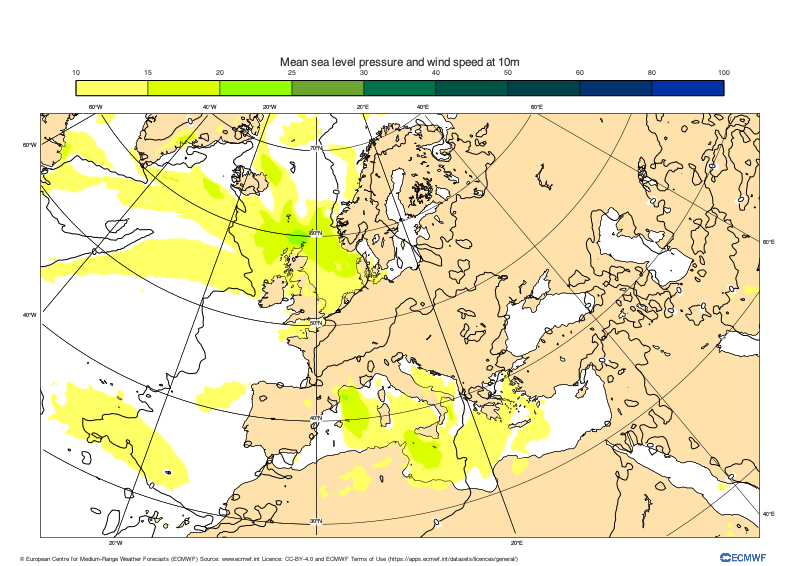

In [48]:
fig = GeoMap(area_name='europe')

fig.coastlines(land_colour="cream",resolution="medium")

fig.contour_shaded(speed, style="green_speed")
fig.contour_lines(msl, style="black_i5")

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["Mean sea level pressure and wind speed at 10m", 
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=msl'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=msl'/>, STEP: <grib_info key='step' where='shortName=msl' />"])
fig.legend()
fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')
fig.show()

Deze kaart kunnen we ook voor een andere uitsnede maken. Hieronder een voorbeeld van central europe.

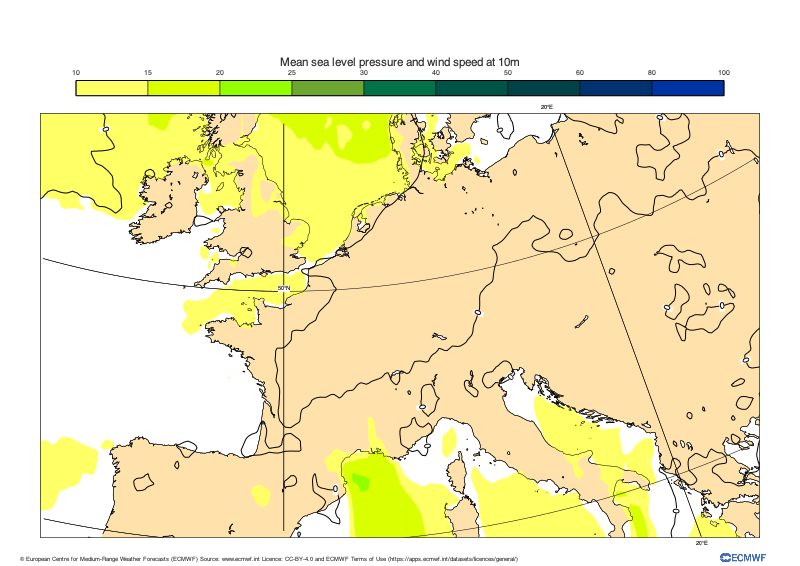

In [86]:
fig = GeoMap(area_name='central_europe')

fig.coastlines(land_colour="cream",resolution="high")

fig.contour_shaded(speed, style="green_speed")
fig.contour_lines(msl, style="black_i5")

fig.coastlines(resolution="high")
fig.gridlines()

fig.title(["Mean sea level pressure and wind speed at 10m", 
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=msl'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=msl'/>, STEP: <grib_info key='step' where='shortName=msl' />"])
fig.legend()
fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')
fig.show()